In [1]:
%%capture --no-stderr
%pip install -U --quiet langchain-community tiktoken langchain-openai langchainhub chromadb langchain langgraph langchain-text-splitters beautifulsoup4

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires protobuf<5,>=4.25.3, but you have protobuf 5.29.4 which is incompatible.


In [2]:
# from langchain_openai import ChatOpenAI
# llm = ChatOpenAI(model="gpt-4o", temperature=0) 

import os
from dotenv import load_dotenv

# 指定 .env 文件路径
env_path = r'C:\GitRepo\langchain-academy\module-1\.env'


# 加载 .env 文件
load_dotenv(dotenv_path=env_path)
print(f"The AZURE_OPENAI_ENDPOINT is: {os.getenv('AZURE_OPENAI_ENDPOINT')}")

os.environ["LANGSMITH_PROJECT"] = "langchain-academy-agentic-rag"

from langchain_openai import AzureChatOpenAI

azure_openai_llm = AzureChatOpenAI(
    azure_deployment=os.getenv('AZURE_OPENAI_DEPLOYMENT'),
    api_version=os.getenv('AZURE_OPENAI_API_VERSION'),
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    streaming=True,
)



The AZURE_OPENAI_ENDPOINT is: https://jz-fdpo-swn.openai.azure.com/


In [3]:
azure_openai_llm.invoke("Hello, world!")


AIMessage(content='Hello, world! 🌍👋 How can I assist you today?', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0'}, id='run--3d807c01-37c9-4dda-af94-ec1bdb860f01-0')

In [4]:
from langchain_openai import AzureOpenAIEmbeddings

azure_openai_embeddings = AzureOpenAIEmbeddings(
    azure_deployment=os.getenv('AZURE_OPENAI_EMBEDDING_DEPLOYMENT'),
    api_version=os.getenv('AZURE_OPENAI_API_VERSION'),
)

# embeddings.embed_query("Hello, world!")


In [10]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

urls = [
    # "https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/content-filter",
    "https://github.com/MicrosoftDocs/azure-ai-docs/blob/main/articles/ai-services/openai/concepts/models.md?plain=1",
    # "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
    "https://github.com/MicrosoftDocs/azure-ai-docs/blob/main/articles/ai-services/openai/how-to/responses.md?plain=1"
]

docs = [WebBaseLoader(url).load() for url in urls]


In [11]:
docs

[[Document(metadata={'source': 'https://github.com/MicrosoftDocs/azure-ai-docs/blob/main/articles/ai-services/openai/concepts/models.md?plain=1', 'title': 'azure-ai-docs/articles/ai-services/openai/concepts/models.md at main · MicrosoftDocs/azure-ai-docs · GitHub', 'description': 'Open Source Azure AI documentation including, azure ai, azure studio, machine learning, genomics, open-datasets, and search - azure-ai-docs/articles/ai-services/openai/concepts/models.md at main · MicrosoftDocs/azure-ai-docs', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nazure-ai-docs/articles/ai-services/openai/concepts/models.md at main · MicrosoftDocs/azure-ai-docs · GitHub\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation Menu\n\nToggle navigation\n\n\n\n\n \n\n\

In [2]:
%pip install markdown

Note: you may need to restart the kernel to use updated packages.


In [7]:
from langchain_community.document_loaders.markdown import (
        UnstructuredMarkdownLoader,
    )

#使用UnstructuredMarkdownLoader加载markdown文件
loader = UnstructuredMarkdownLoader("content-filter-original-in-github.md")
docs = loader.load()



FileNotFoundError: [Errno 2] No such file or directory: 'content-filter-original-in-github.md'

In [4]:
docs

[Document(metadata={'source': 'content-filter-original-in-github.md'}, page_content='title: Azure OpenAI Service content filtering titleSuffix: Azure OpenAI description: Learn about the content filtering capabilities of Azure OpenAI in Azure AI services. author: PatrickFarley ms.author: pafarley ms.service: azure-ai-openai ms.topic: conceptual ms.date: 03/21/2025 ms.custom: template-concept, devx-track-python manager: nitinme\n\nContent filtering\n\n[!IMPORTANT] The content filtering system isn\'t applied to prompts and completions processed by the audio models such as Whisper in Azure OpenAI Service. Learn more about the Audio models in Azure OpenAI.\n\nAzure OpenAI Service includes a content filtering system that works alongside core models, including DALL-E image generation models. This system works by running both the prompt and completion through an ensemble of classification models designed to detect and prevent the output of harmful content. The content filtering system detects 

In [16]:
from langchain_community.document_loaders import TextLoader, UnstructuredMarkdownLoader
loader = TextLoader("content-filter-original-in-github.md")
docs = loader.load()
docs

doc_splits = text_splitter.split_documents(docs)
doc_splits

[Document(metadata={'source': 'content-filter-original-in-github.md'}, page_content="---\ntitle: Azure OpenAI Service content filtering\ntitleSuffix: Azure OpenAI\ndescription: Learn about the content filtering capabilities of Azure OpenAI in Azure AI services.\nauthor: PatrickFarley\nms.author: pafarley\nms.service: azure-ai-openai\nms.topic: conceptual \nms.date: 03/21/2025\nms.custom: template-concept, devx-track-python\nmanager: nitinme\n---\n\n# Content filtering\n\n> [!IMPORTANT]\n> The content filtering system isn't applied to prompts and completions processed by the audio models such as Whisper in Azure OpenAI Service. Learn more about the [Audio models in Azure OpenAI](models.md?tabs=standard-audio#standard-deployment-regional-models-by-endpoint).\n\nAzure OpenAI Service includes a content filtering system that works alongside core models, including DALL-E image generation models. This system works by running both the prompt and completion through an ensemble of classification

In [11]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000, chunk_overlap=100
)


In [12]:
text_splitter

In [15]:
doc_splits = text_splitter.split_documents(docs)
doc_splits

[Document(metadata={'source': 'content-filter-original-in-github.md'}, page_content="---\ntitle: Azure OpenAI Service content filtering\ntitleSuffix: Azure OpenAI\ndescription: Learn about the content filtering capabilities of Azure OpenAI in Azure AI services.\nauthor: PatrickFarley\nms.author: pafarley\nms.service: azure-ai-openai\nms.topic: conceptual \nms.date: 03/21/2025\nms.custom: template-concept, devx-track-python\nmanager: nitinme\n---\n\n# Content filtering\n\n> [!IMPORTANT]\n> The content filtering system isn't applied to prompts and completions processed by the audio models such as Whisper in Azure OpenAI Service. Learn more about the [Audio models in Azure OpenAI](models.md?tabs=standard-audio#standard-deployment-regional-models-by-endpoint).\n\nAzure OpenAI Service includes a content filtering system that works alongside core models, including DALL-E image generation models. This system works by running both the prompt and completion through an ensemble of classification

In [19]:

# # Add to vectorDB
# vectorstore = Chroma.from_documents(
#     documents=doc_splits,
#     collection_name="rag-chroma-azdocs-test",
#     # embedding=OpenAIEmbeddings(),
#     embedding=azure_openai_embeddings,
# )

persist_directory = "chroma_db_test02"
# 创建新的向量存储并保存到本地
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma-azcontent-filter-markdown",
    persist_directory=persist_directory,
    embedding=azure_openai_embeddings,
)
# 保存到本地
# LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
# vectorstore.persist()
print(f"向量存储已保存到: {persist_directory}")

retriever = vectorstore.as_retriever()

向量存储已保存到: chroma_db_test02


In [18]:
# 直接使用vectorstore的带分数搜索方法
query = "What is the content filtering in Azure OpenAI?"
results_with_scores = vectorstore.similarity_search_with_score(query, k=3)

# 遍历结果
for doc, score in results_with_scores:
    print(f"文档内容: {doc.page_content[:30]}")
    print(f"相似度分数: {score}")
    print("---")

In [23]:
from langchain.retrievers.document_compressors import DocumentCompressorPipeline
from langchain.schema import BaseRetriever
from typing import List, Tuple

class VectorStoreRetrieverWithScores(BaseRetriever):
    vectorstore: Any
    k: int = 5
    
    def __init__(self, vectorstore, k=5):
        super().__init__()
        self._vectorstore = vectorstore
        self.k = k
        
    def _get_relevant_documents(self, query):
        results_with_scores = self._vectorstore.similarity_search_with_score(query, k=self.k)
        # 在文档元数据中添加分数
        for doc, score in results_with_scores:
            doc.metadata["score"] = score
        # 只返回文档部分
        return [doc for doc, _ in results_with_scores]
        
    async def _aget_relevant_documents(self, query):
        # 实现异步版本
        raise NotImplementedError("异步方法未实现")

# 使用自定义retriever
custom_retriever = VectorStoreRetrieverWithScores(vectorstore, k=5)
results = custom_retriever._get_relevant_documents("您的查询")

# 访问结果和分数
for doc in results:
    print(f"文档内容: {doc.page_content[:30]}")
    print(f"相似度分数: {doc.metadata['score']}")
    print("---")

NameError: name 'Any' is not defined

In [14]:
# 设置retriever
retriever = vectorstore.as_retriever(
    search_type="similarity",  # 可选值: "similarity", "mmr", "similarity_score_threshold"
    search_kwargs={"k": 5}     # 设置返回前5个结果
)

# 如果要使用最大边际相关性搜索(MMR)
# retriever = vectorstore.as_retriever(search_type="mmr", search_kwargs={"k": 5, "fetch_k": 20})

# 如果要设置相似度阈值
retriever = vectorstore.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.5, "k": 5})

In [15]:
retriever.invoke("What is the content filtering in Azure OpenAI?")

[Document(metadata={'source': 'https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/content-filter', 'description': 'Learn about the content filtering capabilities of Azure OpenAI in Azure AI services.', 'title': 'Azure OpenAI Service content filtering - Azure OpenAI | Microsoft Learn', 'language': 'en-us'}, page_content="Azure OpenAI Service content filtering - Azure OpenAI | Microsoft Learn\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to main content\nSkip to Ask Learn chat experience\n\n\n\n\nThis browser is no longer supported.\n\n\t\t\t\t\t\tUpgrade to Microsoft Edge to take advantage of the latest features, security updates, and technical support.\n\t\t\t\t\t\n\n\n\t\t\t\t\t\t\tDownload Microsoft Edge\n\t\t\t\t\t\t\n\n\t\t\t\t\t\t\tMore info about Internet Explorer and Microsoft Edge\n\t\t\t\t\t\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\

# start to build graph

## load retriever using existed chroma db

In [21]:

from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 本地向量存储的路径
persist_directory = "db/chroma_db_azure_docs_rag"

vectorstore_force_update = False

# 检查向量存储是否已存在
if os.path.exists(persist_directory) and os.path.isdir(persist_directory) and len(os.listdir(persist_directory)) > 0 and not vectorstore_force_update:
    print(f"正在从本地加载向量存储: {persist_directory}")
    # 直接从本地加载向量存储
    vectorstore = Chroma(
        persist_directory=persist_directory,
        embedding_function=azure_openai_embeddings,
        collection_name="chroma_db_azure_docs_rag_collection"
    )
else:
    print("本地向量存储不存在")
    # urls = [
    #     # "https://lilianweng.github.io/posts/2023-06-23-agent/",
    #     # "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    #     # "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
    #     "https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models",
    #     "https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/content-filter"

    # ]

    # docs = [WebBaseLoader(url).load() for url in urls]
    # docs_list = [item for sublist in docs for item in sublist]

    # text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    #     chunk_size=1000, chunk_overlap=200
    # )
    # doc_splits = text_splitter.split_documents(docs_list)

    # # 创建新的向量存储并保存到本地
    # vectorstore = Chroma.from_documents(
    #     documents=doc_splits,
    #     collection_name="rag-chroma",
    #     persist_directory=persist_directory,
    #     embedding=azure_openai_embeddings,
    # )
    # # 保存到本地
    # # LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
    # # vectorstore.persist()
    # print(f"向量存储已保存到: {persist_directory}")


正在从本地加载向量存储: db/chroma_db_azure_docs_rag


In [22]:
vectorstore.similarity_search("What is the difference between Azure OpenAI and Azure Cognitive Services?")

[Document(metadata={'source': 'data\\azure-openai-models.md'}, page_content='---\ntitle: Azure OpenAI Service models\ntitleSuffix: Azure OpenAI\ndescription: Learn about the different model capabilities that are available with Azure OpenAI.\nms.service: azure-ai-openai\nms.topic: conceptual\nms.date: 04/23/2025\nms.custom: references_regions, build-2023, build-2023-dataai, refefences_regions\nmanager: nitinme\nauthor: mrbullwinkle #ChrisHMSFT\nms.author: mbullwin #chrhoder#\nrecommendations: false\n---\n\n# Azure OpenAI Service models\n\nAzure OpenAI Service is powered by a diverse set of models with different capabilities and price points. Model availability varies by region and cloud. For Azure Government model availability, please refer to [Azure Government OpenAI Service](../azure-government.md).\n\n| Models | Description |\n|--|--|\n| [GPT-4.1 series](#gpt-41-series) | Latest model release from Azure OpenAI |\n| [computer-use-preview](#computer-use-preview) | An experimental model

In [23]:
retriever = vectorstore.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.1, "k": 5})

retriever.invoke("What is the content filtering in Azure OpenAI?")

[Document(metadata={'source': 'data\\content-filter-original-in-github.md'}, page_content="---\ntitle: Azure OpenAI Service content filtering\ntitleSuffix: Azure OpenAI\ndescription: Learn about the content filtering capabilities of Azure OpenAI in Azure AI services.\nauthor: PatrickFarley\nms.author: pafarley\nms.service: azure-ai-openai\nms.topic: conceptual \nms.date: 03/21/2025\nms.custom: template-concept, devx-track-python\nmanager: nitinme\n---\n# Content filtering\n\n> [!IMPORTANT]\n> The content filtering system isn't applied to prompts and completions processed by the audio models such as Whisper in Azure OpenAI Service. Learn more about the [Audio models in Azure OpenAI](models.md?tabs=standard-audio#standard-deployment-regional-models-by-endpoint).\n\nAzure OpenAI Service includes a content filtering system that works alongside core models, including DALL-E image generation models. This system works by running both the prompt and completion through an ensemble of classifica

In [24]:

from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
        "retrieve_azure_openai_docs",
        "Search and return information about Azure OpenAI.",
)

In [10]:
# from langchain.tools.retriever import create_retriever_tool

# retriever_tool = create_retriever_tool(
#     retriever,
#     "retrieve_blog_posts",
#     "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.",
# )


In [25]:

tools = [retriever_tool]

In [26]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [27]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

from pydantic import BaseModel, Field


from langgraph.prebuilt import tools_condition

### Edges


def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    # model = ChatOpenAI(temperature=0, model="gpt-4o", streaming=True)
    llm = azure_openai_llm

    # LLM with tool and validation
    llm_with_tool = llm.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"


### Nodes


def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    # model = ChatOpenAI(temperature=0, streaming=True, model="gpt-4-turbo")
    # model = azure_openai_llm
    llm_with_tool = azure_openai_llm.bind_tools(tools)
    response = llm_with_tool.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}


def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    # model = ChatOpenAI(temperature=0, model="gpt-4-0125-preview", streaming=True)
    llm = azure_openai_llm
    response = llm.invoke(msg)
    return {"messages": [response]}


def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated state with re-phrased question
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    # llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0, streaming=True)
    llm = azure_openai_llm

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}


print("*" * 20 + "Prompt[rlm/rag-prompt]" + "*" * 20)
prompt = hub.pull("rlm/rag-prompt").pretty_print()  # Show what the prompt looks like

********************Prompt[rlm/rag-prompt]********************
================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [28]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()

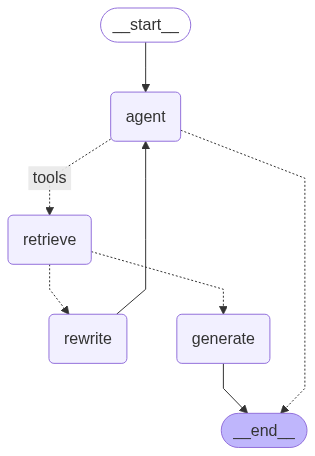

In [29]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [30]:
import pprint

inputs = {
    "messages": [
        ("user", "Does Azure OpenAI Responses API support web search tools?"),
    ]
}
for output in graph.stream(inputs):
    for key, value in output.items():
        pprint.pprint(f"Output from node '{key}':")
        pprint.pprint("---")
        pprint.pprint(value, indent=2, width=80, depth=None)
    pprint.pprint("\n---\n")

---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_0b7KOVdKqaBEUPlHjd2W4jaV', 'function': {'arguments': '{"query":"Azure OpenAI Responses API web search tools support"}', 'name': 'retrieve_azure_openai_docs'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0'}, id='run--e9601d22-debe-4d2c-8eff-49d1c03792bb-0', tool_calls=[{'name': 'retrieve_azure_openai_docs', 'args': {'query': 'Azure OpenAI Responses API web search tools support'}, 'id': 'call_0b7KOVdKqaBEUPlHjd2W4jaV', 'type': 'tool_call'}])]}
'\n---\n'
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='client = AzureOpenAI(  \n  base_url = "https://YOUR-RESOURCE-NAME.openai.azure.com/openai/v1/",  \n  azure_ad_token_provider=token_provider,\n  api_version="preview"\n)\n

In [31]:
import pprint

inputs = {
    "messages": [
        ("user", "Does Azure OpenAI Responses API support code interpreter as tools?"),
    ]
}
for output in graph.stream(inputs):
    for key, value in output.items():
        pprint.pprint(f"Output from node '{key}':")
        pprint.pprint("---")
        pprint.pprint(value, indent=2, width=80, depth=None)
    pprint.pprint("\n---\n")

---CALL AGENT---
"Output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_0uto6hafNI3FgCKJN7jxdbkF', 'function': {'arguments': '{"query":"Azure OpenAI Responses API support code interpreter as tools"}', 'name': 'retrieve_azure_openai_docs'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0'}, id='run--d3de76b2-0d74-4202-b72e-6c91d04481d8-0', tool_calls=[{'name': 'retrieve_azure_openai_docs', 'args': {'query': 'Azure OpenAI Responses API support code interpreter as tools'}, 'id': 'call_0uto6hafNI3FgCKJN7jxdbkF', 'type': 'tool_call'}])]}
'\n---\n'
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
"Output from node 'retrieve':"
'---'
{ 'messages': [ ToolMessage(content='Alternatively you can manually chain responses together using the method below:\n\n```python\nfrom openai import AzureOpenAI\nfrom azure.identity import